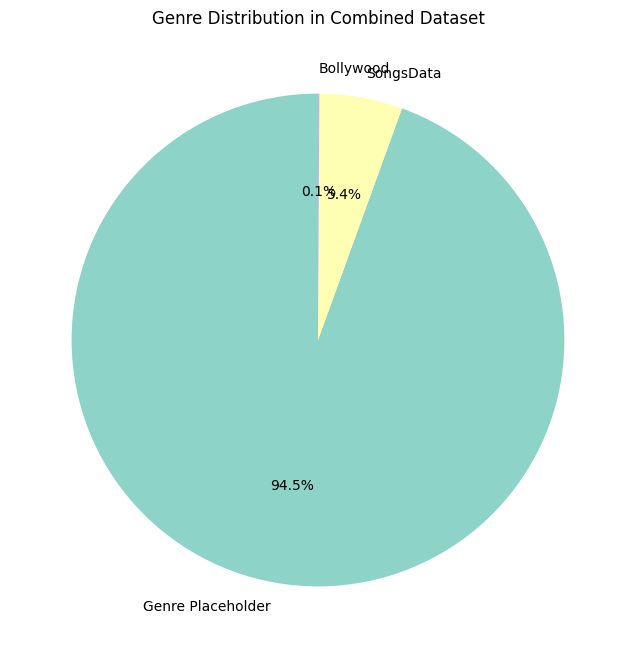

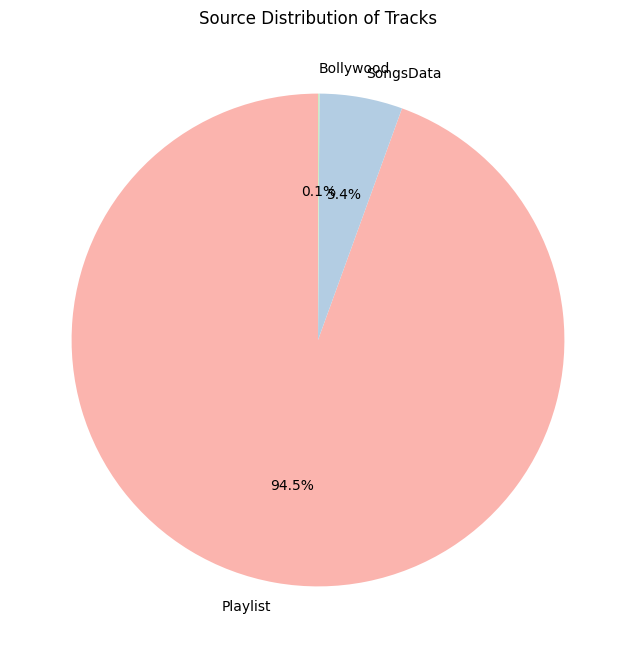

C:\Users\rites\AppData\Local\Temp\ipykernel_15140\3456767229.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=track_counts.values, y=track_counts.index, palette="Blues_r")


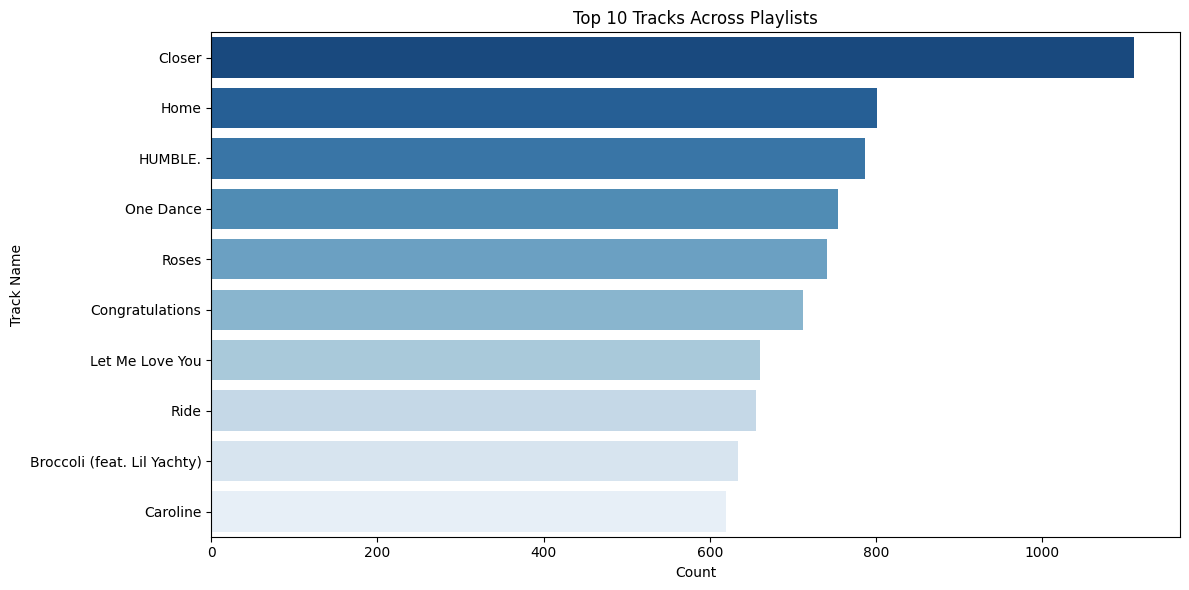

C:\Users\rites\AppData\Local\Temp\ipykernel_15140\3456767229.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="coolwarm")


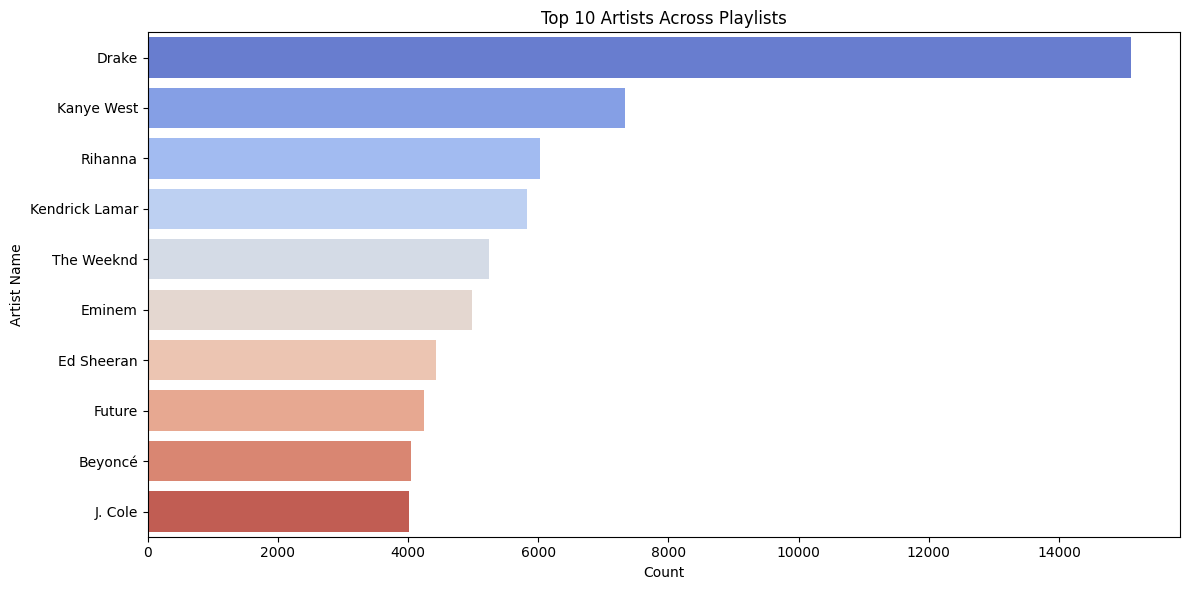

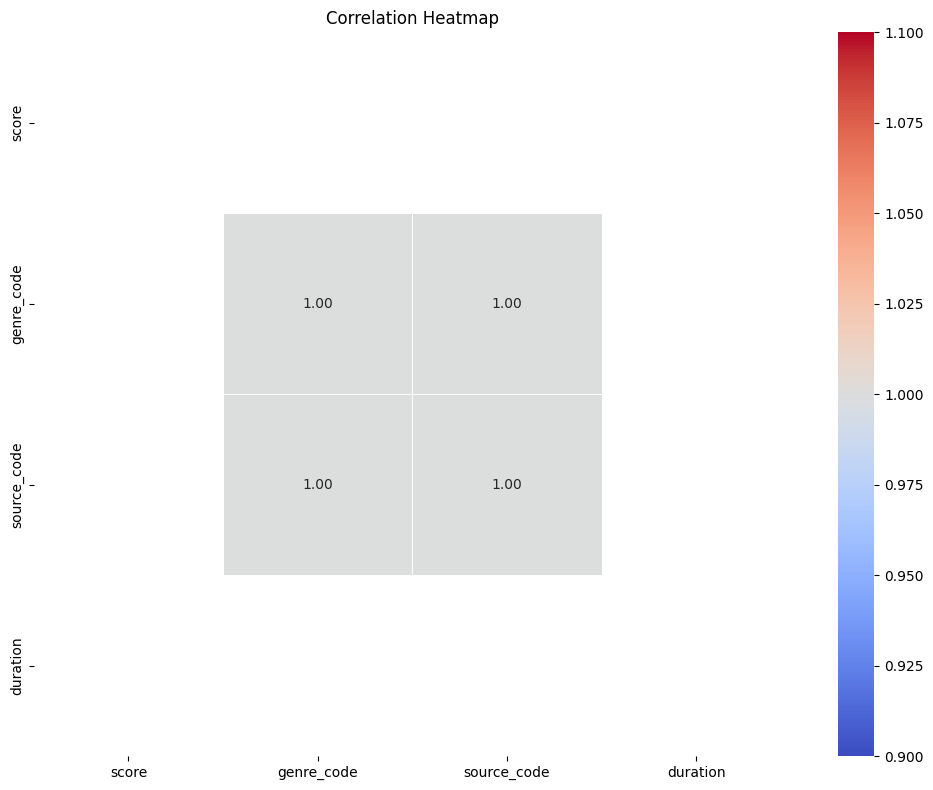

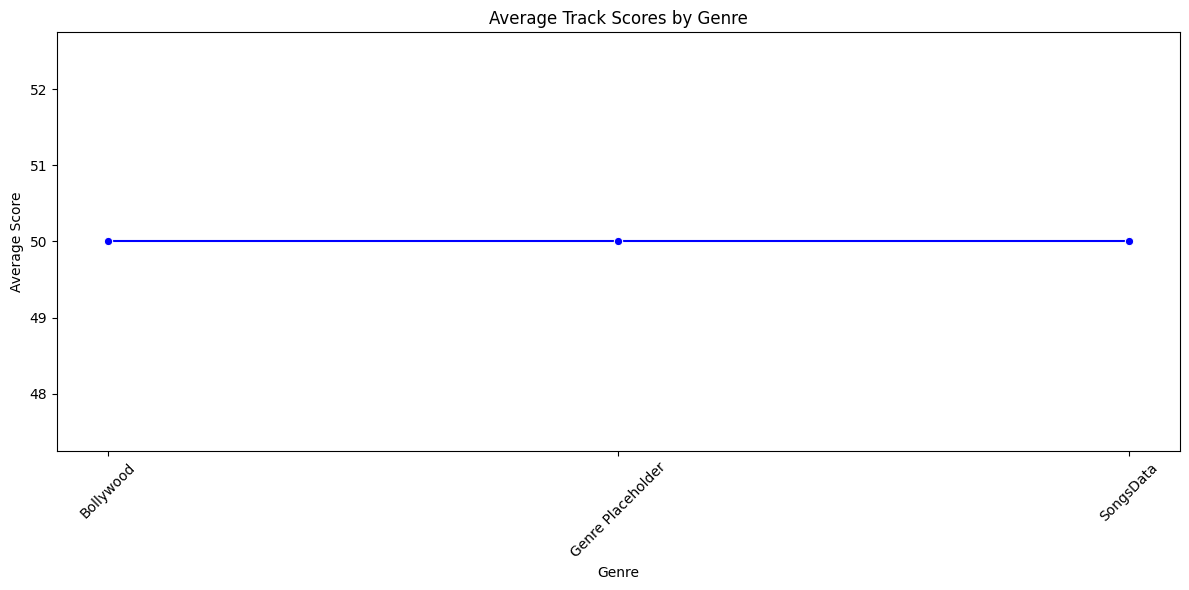

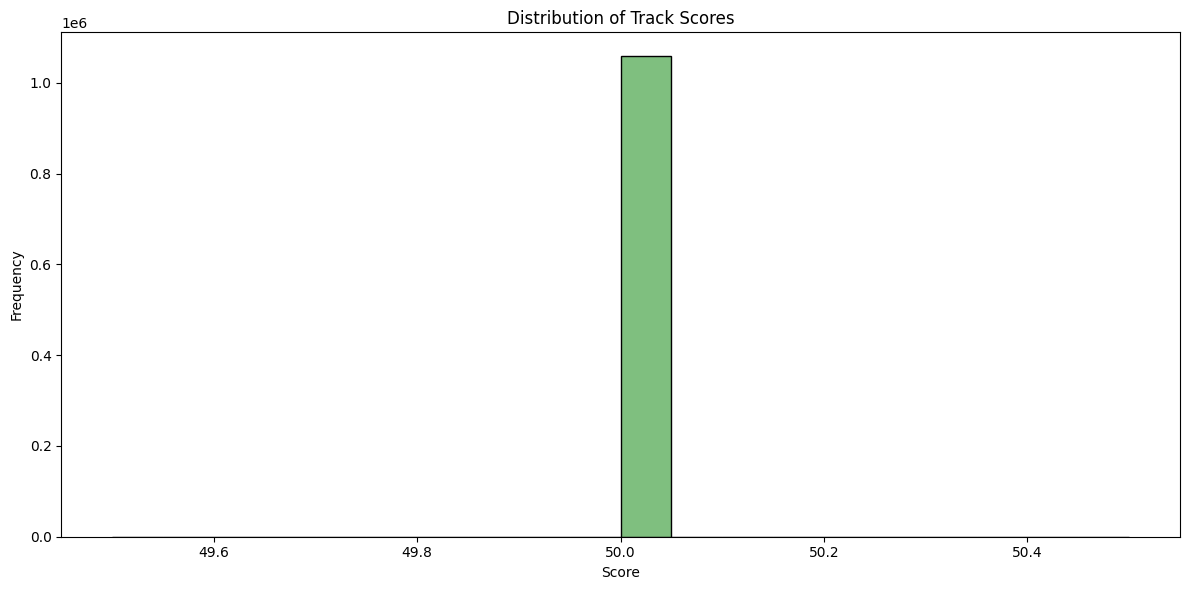

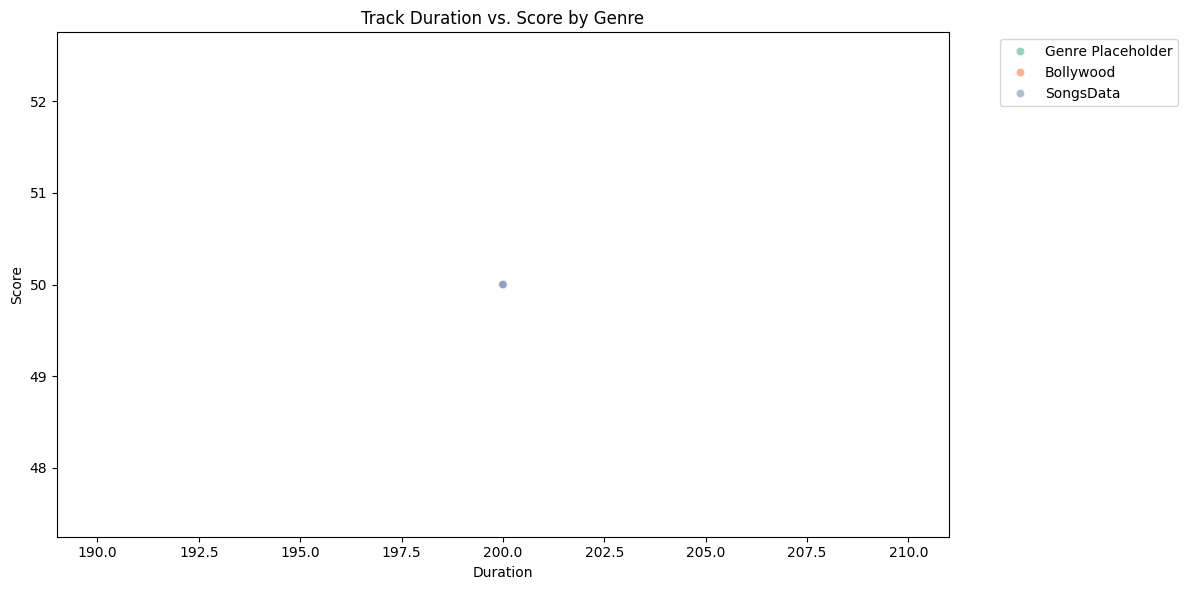

C:\Users\rites\AppData\Local\Temp\ipykernel_15140\3456767229.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='score', data=df, palette="Set3")


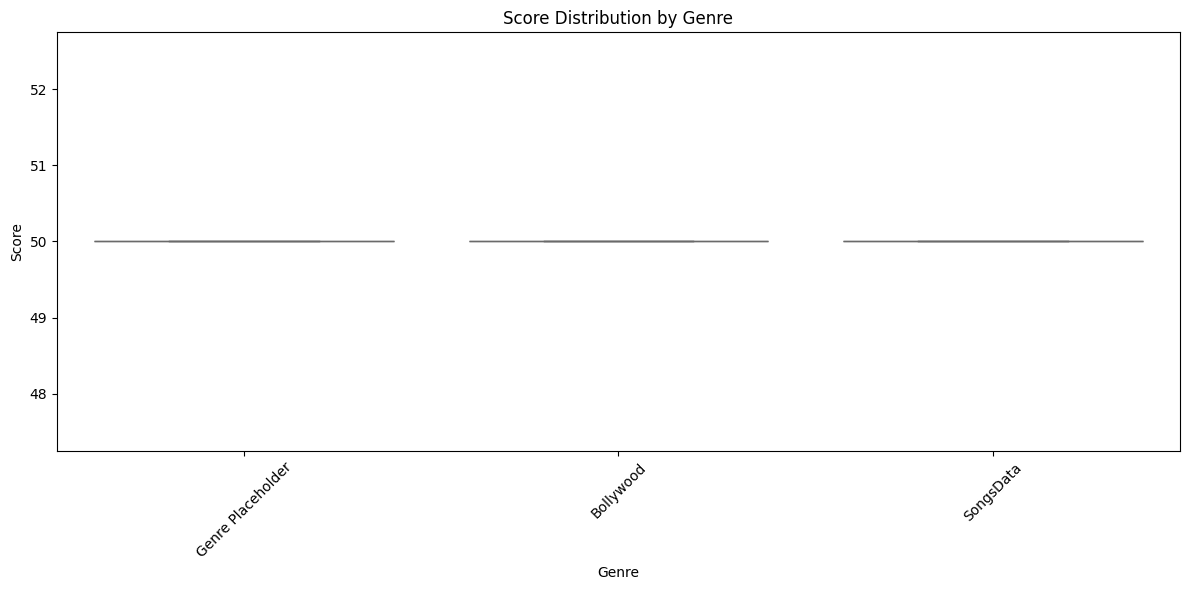

C:\Users\rites\AppData\Local\Temp\ipykernel_15140\3456767229.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='count', data=year_counts, palette="magma")


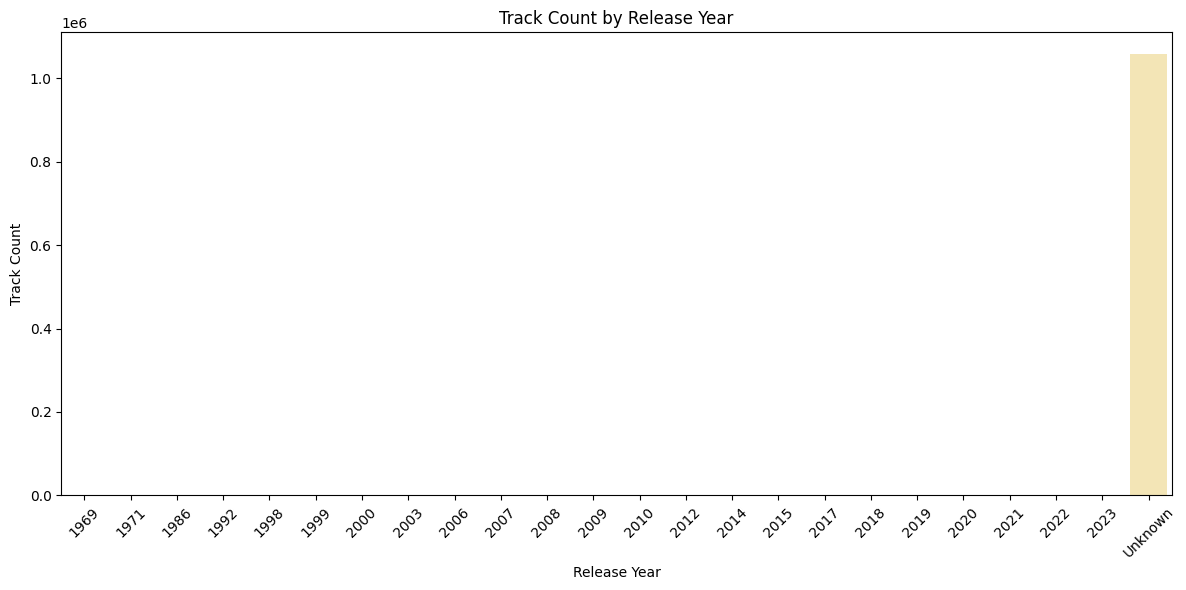

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
file_1_path = 'playlist_1.csv'
file_2_path = 'playlist_2.csv'
bollywood_file_path = 'Bollywood-Songs-Dataset(2017-23).csv'
songsdata_file_path = 'songdata.csv'

df_tracks_1 = pd.read_csv(file_1_path)
df_tracks_2 = pd.read_csv(file_2_path)
df_bollywood = pd.read_csv(bollywood_file_path)
df_songsdata = pd.read_csv(songsdata_file_path)

# Clean and standardize column names for playlist datasets
columns = ['playlist_id', 'artist', 'artist_uri', 'track_name', 'track_uri']
df_tracks_1.columns = columns
df_tracks_2.columns = columns

# Add placeholders to ensure consistency across datasets
def add_placeholders(df):
    df['album'] = 'Album Placeholder'
    df['duration'] = 200
    df['score'] = 50
    df['genre'] = 'Genre Placeholder'
    df['source'] = 'Playlist'
    return df

df_tracks_1 = add_placeholders(df_tracks_1)
df_tracks_2 = add_placeholders(df_tracks_2)

# Combine playlist datasets
df_tracks = pd.concat([df_tracks_1, df_tracks_2], ignore_index=True)

# Prepare Bollywood dataset with matching column names
df_bollywood = df_bollywood.rename(columns={
    'music_name': 'track_name',
    'singer': 'artist',
    'release': 'release_year'
})
df_bollywood['album'] = 'Bollywood Album'
df_bollywood['duration'] = 200  # Placeholder
df_bollywood['score'] = 50  # Placeholder
df_bollywood['genre'] = 'Bollywood'
df_bollywood['source'] = 'Bollywood'

# Prepare songsdata dataset with matching column names
df_songsdata = df_songsdata.rename(columns={
    'song_name': 'track_name',
    'performer': 'artist',
    'album_title': 'album'
})
df_songsdata['duration'] = 200  # Placeholder
df_songsdata['score'] = 50  # Placeholder
df_songsdata['genre'] = 'SongsData'
df_songsdata['source'] = 'SongsData'
df_songsdata['release_year'] = 'Unknown'

# Merge all datasets into a unified DataFrame
df_combined = pd.concat([df_tracks, df_bollywood, df_songsdata], ignore_index=True)

# Function to track playlists for a given track or artist
def track_playlists(df, track_name=None, artist_name=None):
    if track_name:
        results = df[df['track_name'].str.contains(track_name, case=False, na=False)]
    elif artist_name:
        results = df[df['artist'].str.contains(artist_name, case=False, na=False)]
    else:
        results = pd.DataFrame()
    return results[['playlist_id', 'track_name', 'artist', 'album', 'genre', 'source']]

# Visualization Functions
def plot_genre_pie_chart(df):
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(8, 8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(genre_counts)))
    plt.title("Genre Distribution in Combined Dataset")
    plt.ylabel('')
    plt.show()

def plot_source_pie_chart(df):
    source_counts = df['source'].value_counts()
    plt.figure(figsize=(8, 8))
    source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Pastel1", len(source_counts)))
    plt.title("Source Distribution of Tracks")
    plt.ylabel('')
    plt.show()

def plot_top_tracks_in_playlists(df, n=10):
    track_counts = df['track_name'].value_counts().head(n)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=track_counts.values, y=track_counts.index, palette="Blues_r")
    plt.title(f"Top {n} Tracks Across Playlists")
    plt.xlabel("Count")
    plt.ylabel("Track Name")
    plt.tight_layout()
    plt.show()

def plot_top_artists_in_playlists(df, n=10):
    artist_counts = df['artist'].value_counts().head(n)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="coolwarm")
    plt.title(f"Top {n} Artists Across Playlists")
    plt.xlabel("Count")
    plt.ylabel("Artist Name")
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    # Encode genres for correlation
    df['genre_code'] = df['genre'].astype('category').cat.codes
    df['source_code'] = df['source'].astype('category').cat.codes
    corr_matrix = df[['score', 'genre_code', 'source_code', 'duration']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Example usage and visualization
tracked_playlists = track_playlists(df_combined, track_name="Islands")  # Example: Track "Islands"

# Plot pie charts
plot_genre_pie_chart(df_combined)
plot_source_pie_chart(df_combined)

# Plot bar graphs
plot_top_tracks_in_playlists(df_combined, n=10)
plot_top_artists_in_playlists(df_combined, n=10)

# Plot heatmap
plot_correlation_heatmap(df_combined)
def plot_genre_score_trend(df):
    genre_scores = df.groupby('genre')['score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=genre_scores.index, y=genre_scores.values, marker='o', color='b')
    plt.title("Average Track Scores by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_score_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['score'], bins=20, kde=True, color='green')
    plt.title("Distribution of Track Scores")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def plot_duration_vs_score(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='duration', y='score', hue='genre', data=df, palette="Set2", alpha=0.7)
    plt.title("Track Duration vs. Score by Genre")
    plt.xlabel("Duration")
    plt.ylabel("Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_score_boxplot_by_genre(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='genre', y='score', data=df, palette="Set3")
    plt.title("Score Distribution by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_track_count_by_year(df):
    release_year_counts = df['release_year'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette="magma")
    plt.title("Track Count by Release Year")
    plt.xlabel("Release Year")
    plt.ylabel("Track Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage of the additional graphs
plot_genre_score_trend(df_combined)
plot_score_distribution(df_combined)
plot_duration_vs_score(df_combined)
plot_score_boxplot_by_genre(df_combined)

# Handle release year as categorical data for tracks without a known year
def plot_track_count_by_year(df):
    # Separate numeric years and "Unknown" for sorting
    df['release_year'] = df['release_year'].astype(str)  # Ensure all values are strings
    numeric_years = df[df['release_year'].str.isnumeric()]
    unknown_years = df[df['release_year'] == 'Unknown']
    
    # Count numeric years and sort them
    numeric_year_counts = numeric_years['release_year'].astype(int).value_counts().sort_index()
    unknown_year_count = len(unknown_years)
    
    # Combine results into a unified DataFrame for visualization
    if unknown_year_count > 0:
        year_counts = pd.DataFrame({'year': list(numeric_year_counts.index) + ['Unknown'], 
                                    'count': list(numeric_year_counts.values) + [unknown_year_count]})
    else:
        year_counts = pd.DataFrame({'year': numeric_year_counts.index, 'count': numeric_year_counts.values})
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='count', data=year_counts, palette="magma")
    plt.title("Track Count by Release Year")
    plt.xlabel("Release Year")
    plt.ylabel("Track Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ensure the `release_year` column is properly initialized
df_combined['release_year'] = df_combined['release_year'].fillna('Unknown')

# Call the function to test it
plot_track_count_by_year(df_combined)

